In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt
import tifffile
import os
from pathlib import Path
from spectral import *

In [2]:
folder = 'P1_Pohang/'
tif_path = '/storage/jgjang/Maritime_data/TIFF/' + folder
hsi_path = tif_path.replace('TIFF','HSI_DATA')
Plot_fig = True
## Load Images

tif_list = sorted(glob.glob(f'{tif_path}*.tif'))
jpg_list = sorted(glob.glob(f'{tif_path}*.jpg'))
hsimage_list = sorted(glob.glob(f'{hsi_path}*rect.jpg'))
ndvi_list = sorted(glob.glob(f'{hsi_path}*ndvi.jpg'))


In [3]:
hsi_ind = 9
hsi= cv2.imread('/storage/jgjang/Maritime_data/tmp/' + os.path.basename(hsimage_list[hsi_ind]))[:,:,2::-1]
path = os.path.join(*Path(os.path.splitext(hsimage_list[hsi_ind])[0]).parts)
path = path.replace('HSI_DATA', 'SEMI_FINAL')
AA = os.path.join(*Path(os.path.split(path)[0]).parts)
if not os.path.exists(AA):
    os.makedirs(AA)

In [4]:
if folder == 'P1_Pohang/':
    if hsi_ind == 0:
        tif_ind = 0; hsi1 = np.array([1099, 360]); hsi2 = np.array([460, 7790]); org1 = np.array([1096, 22]); org2 = np.array([479, 7445])
    if hsi_ind == 1:
        tif_ind = 0; hsi1 = np.array([567, 422]);  org1 = np.array([1100, 24]); hsi2 = np.array([1296, 2471]); org2 = np.array([1831, 2177])
    if hsi_ind == 2:
        tif_ind = 0; hsi1 = np.array([1198, 633]);  org1 = np.array([2320, 307]); hsi2 = np.array([686, 2517]); org2 = np.array([1831, 2177])
    if hsi_ind == 3:
        tif_ind = 0; hsi1 = np.array([1218, 840]);  org1 = np.array([2884, 406]); hsi2 = np.array([618, 2113]); org2 = np.array([2306, 1679])
    if hsi_ind == 4:
        tif_ind = 0; hsi1 = np.array([1181, 324]);  org1 = np.array([3456, 9]); hsi2 = np.array([478, 3942]); org2 = np.array([2769, 3628])
    if hsi_ind == 5:
        tif_ind = 0; hsi1 = np.array([194, 221]);  org1 = np.array([3129, 34]); hsi2 = np.array([1125, 6984]); org2 = np.array([4033, 6804])
    if hsi_ind == 6:
        tif_ind = 0; hsi1 = np.array([789, 5105]);  org1 = np.array([4259, 4888]); hsi2 = np.array([663, 3901]); org2 = np.array([4136, 3682])
    if hsi_ind == 9:
        tif_ind = 0; hsi1 = np.array([1188, 5652]);  org1 = np.array([6315, 5654]); hsi2 = np.array([481, 5978]); org2 = np.array([5630, 5968])
        
        
        

In [5]:
tif = tifffile.imread(tif_list[tif_ind])

In [6]:
def converter(point):
    slope = (org2 - org1)/(hsi2 - hsi1)
    point_new = slope * (point - hsi1)  + org1
    return (7*point_new).astype(int)

In [7]:
stride = 224

col_num = int(np.floor(hsi.shape[0]/stride))
row_num = int(np.floor(hsi.shape[1]/stride))
print(col_num, row_num)
for col_ind in range(col_num):
    #print('col_num is ' + str(col_ind))
    for row_ind in range(row_num):
        c_start = col_ind * stride; c_end = (col_ind+1)*stride
        r_start = row_ind * stride; r_end = (row_ind+1)*stride
        if np.sum(np.sum(hsi[c_start:c_end, r_start:r_end,:],axis=2)==0) > 0.33* stride**2:
            #print('1')
            continue
        st = converter([c_start, r_start]); ed = converter([c_end, r_end])
        if np.sum(st <0)>0 or np.sum(ed > tif[:,:,0].shape)>0:
            #print('2')
            #print(st)
            #print(ed)
            continue
        path_f_save =f'{path}_{col_ind}_{row_ind}'
        #print(f'{path_f_save}_hsi.jpg')
        cv2.imwrite(f'{path_f_save}_h_res.jpg',
                tif[st[0]: ed[0], st[1]:ed[1],:])
        cv2.imwrite(f'{path_f_save}_r_res.jpg',
                hsi[c_start: c_end, r_start: r_end,:])
        
        

6 39


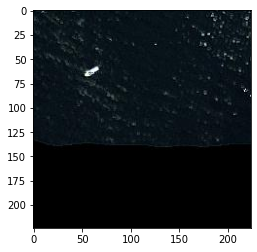

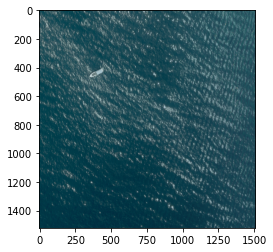

In [19]:
col_ind = 5
row_ind = 25
stride = 224
c_start = col_ind * stride; c_end = (col_ind+1)*stride
r_start = row_ind * stride; r_end = (row_ind+1)*stride
st = converter([c_start, r_start]); ed = converter([c_end, r_end])
plt.imshow(hsi[c_start: c_end, r_start: r_end,:])
plt.show()
plt.imshow(tif[st[0]: ed[0], st[1]:ed[1],:])
plt.show()